# 예측변수 반영 

실제 사회에서 통용되는 데이터는 대개 무수히 많은 서로 다른 데이터로 구성된 복잡한 행렬로 구성된다. 행렬의 크기는 nxp로 n은 행렬의 개수, p는 열의 개수를 나타낸다. 

파이썬에서는 다음과 같은 두 가지 방법으로 행렬을 생성할 수 있다.


In [ ]:
import numpy as np

In [ ]:
#출력 한 번에 나올 수 있게 설정
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
#1 리스트 안에 리스트를 변환하는 방법으로 안에 있는 리스트 각 각은 행이 된다.
multiple_feature_matrix = np.array([[1,2,3,4,5], [6,7,8,9,10], [11,12,13,14,15]])
multiple_feature_matrix

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [ ]:
#2 우선 값을 부여하고 행과 열을 따로 지정해주는 방식
vector = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
multiple_feature_matrix = vector.reshape((3,5))
multiple_feature_matrix

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [ ]:
#Tip Numpy에는 1행렬과 0행렬을 신속하게 생성할 수 있는 함수가 있다. 인수로 원하는 (x, y) 모양을 지정하면 된다. 

all_zeros=np.zeros((5,3))
all_ones=np.ones((5,3))

all_zeros
all_ones

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

## 단순선형회귀를 위한 준비

데이터셋은 예측변수와 때로는 응답변수를 포함하는 데이터 구조다. 머신 러닝 목적을 위해, 데이터셋은 행과 열로 된 테이블 모양의 행렬 형태로 구조화되거나 반 구조화될 수 있다. 

간단 선형회귀분석을 위해 부동산 평가와 관련된 몇 개의 데이터셋을 선택한다. 
부동산은 인구 조사를 통해 자유롭게 이용할 수 있는 데이터가 상당히 많고 공개돼 있으며, 심지어 시장 및 공급을 모니터링하는 웹사이트로부터 더 많은 데이터를 가져올 수 있기 때문에 자동 예측 모델에서 꽤 흥미로운 주제가 된다. 또한 주택을 빌리거나 사는 것은 수 많은 개인에게 경제적으로 중요한 결정 문제이기 때문에, 이용할 수 있는 많은 양의 정보를 수집하고 판단하게 도와주는 온라인 서비스는 좋은 비즈니스 모델이 된다. 


*-> 데이터의 접근성(또는 공개여부)에 독립변수를 선택함에 있어서 편향이 발생하는 것이 아닐까 우려된다. 종속변수를 더 잘 설명해줄 수 있는 독립변수가 어딘가에 존재함에도 연구자의 시야에 들어가지 못하거나 들어가더라도 해당 데이터를 추출할 수 없는 경우, 모형의 설명력이 떨어지는 것 아닐까 *


### Data1
*   1970년도 인구 조사로부터 가져온 보스턴의 506개 인구조사 구역
*   부동산 가치에 영향을 줄 수 있는 다양한 측면에 관한 21개의 특성변수
*   목표변수는 수천 달러(USD)로 표시되는 주택의 Median이다.
*   특성변수는 방의 개수, 건물 연식, 이웃의 범죄 수준, 오염 농도, 인근 학교와의 접근성, 고속도로 접근성, 취업 센터와의 거리 등


### Data2
*   Carnegie mellon University Statlib repository의 데이터 셋
*   1990년 미국 인구 조사에서 파생된 20,640개의 관찰 결과 포함
*   각 각의 관찰은 지리적으로 밀접한 지역에 사는 1425명의 특정 블록 그룹에 관한 일련의 통계값이다.
*   9개의 예측변수 사용
*   목표변수는 해당 블록의 주택값을 나타내는 지표
*   예측 변수는 중간 소득

두 번째 데이터셋은 1997년 Pace & Barry의 <Sparse Spatial Autoregressions, Statistics and Probability Letters>에 사용되었다. 여기에서 공간변수란 분석에 있어 다른 위치에 대한 상대적인 위치 표시와 근접성을 나타내기 위한 위치 정보를 의미한다. 이런 데이터셋은 인구, 건물의 밀도, 지역별로 집계된 인구밀도 등을 나타내는 외부 변수에 의해 주택 가치가 변동될 수 있다는 배경을 가지고 있다.













In [ ]:
#data download

from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston
boston = load_boston()
california = fetch_california_housing()

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target']=boston.target

가장 간단한 모델은 단순선형회귀가 아니라 통계적 평균이다. 평균은 데이터 요약을 설명하는 강력한 숫자이다. 정규적으로 분포된 데이터에서는 평균이 데이터의 중심을 잘 나타내기 때문에 잘 작동하지만, 그렇지 않은 분포의 데이터에서는 적합하지 않을 수 있다. 

정규분포 곡선은 대칭적이며 높이와 산포와 관련해 특정한 특성을 갖는 데이터 분포다.
분포가 정규인 것을 파악하기 위한 핵심은 분포에서 값의 확률을 설명하는 함수인 확률 밀도함수(Probability Density Function)이다. 

표본공간 위에 정의된 실수값 함수를 확률변수라 하고, 확률변수 X의 값에 따라 확률이 어떻게 흩어져 있는지를 합이 1인 양수로써 나타낸 것을 X의 확률분포라고 한다. 


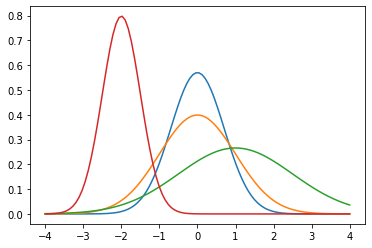

In [ ]:
from scipy.stats import norm
import math
x = np.linspace(-4, 4, 100)
for mean, variance in [(0, 0.7), (0, 1), (1, 1.5), (-2, 0.5)]:
  plt.plot(x, norm.pdf(x, mean, variance))

plt.show()

#matplotlib.mlab as mlab에서 mlab.normpdf가 실행되지 않아 위와 scipy로 대체함.